In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [12]:
# MNIST is built into Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


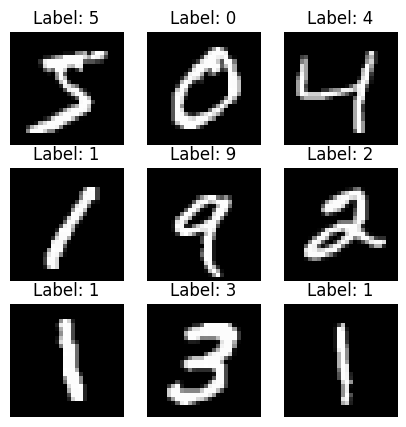

In [13]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [4]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ensure correct one-hot encoding (to avoid double encoding)
from tensorflow.keras.utils import to_categorical

if y_train.ndim == 1:
    y_train = to_categorical(y_train, 10)
if y_test.ndim == 1:
    y_test = to_categorical(y_test, 10)

# Fix in case they got extra dimensions by mistake
if y_train.ndim > 2:
    y_train = np.argmax(y_train, axis=-1)
    y_train = to_categorical(y_train, 10)

if y_test.ndim > 2:
    y_test = np.argmax(y_test, axis=-1)
    y_test = to_categorical(y_test, 10)


In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten 28x28 → 784
    Dense(128, activation='relu'),       # Hidden layer
    Dense(64, activation='relu'),        # Hidden layer
    Dense(10, activation='softmax')      # Output layer (10 classes)
])


C:\Users\palji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)


Epoch 1/10
422/422 - 6s - 15ms/step - accuracy: 0.8948 - loss: 0.3706 - val_accuracy: 0.9588 - val_loss: 0.1493
Epoch 2/10
422/422 - 3s - 7ms/step - accuracy: 0.9562 - loss: 0.1488 - val_accuracy: 0.9692 - val_loss: 0.1109
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.9688 - loss: 0.1041 - val_accuracy: 0.9745 - val_loss: 0.0968
Epoch 4/10
422/422 - 3s - 7ms/step - accuracy: 0.9759 - loss: 0.0791 - val_accuracy: 0.9770 - val_loss: 0.0831
Epoch 5/10
422/422 - 3s - 7ms/step - accuracy: 0.9818 - loss: 0.0602 - val_accuracy: 0.9773 - val_loss: 0.0815
Epoch 6/10
422/422 - 3s - 7ms/step - accuracy: 0.9842 - loss: 0.0500 - val_accuracy: 0.9773 - val_loss: 0.0771
Epoch 7/10
422/422 - 3s - 7ms/step - accuracy: 0.9879 - loss: 0.0400 - val_accuracy: 0.9755 - val_loss: 0.0867
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.9892 - loss: 0.0348 - val_accuracy: 0.9787 - val_loss: 0.0774
Epoch 9/10
422/422 - 3s - 8ms/step - accuracy: 0.9917 - loss: 0.0270 - val_accuracy: 0.9795 - val_loss: 0.0775


In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Test Accuracy: 97.69%


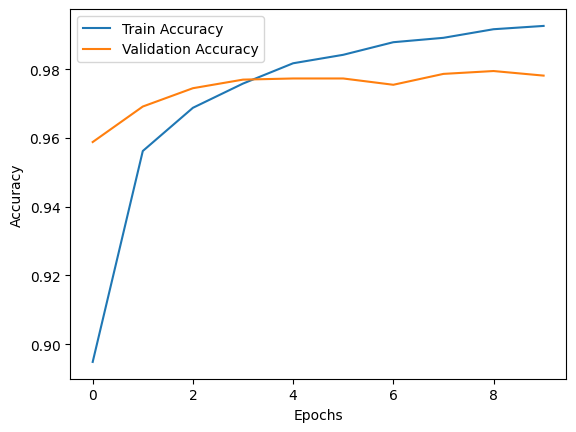

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


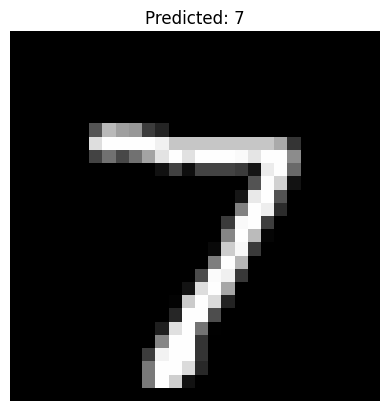

In [10]:
predictions = model.predict(X_test)

# Display one example
index = 0
plt.imshow(X_test[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.axis('off')
plt.show()
